# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin IS 
* done individually
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **March 8th kl. 8.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).
Good luck!

In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [2]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import seaborn as sns

RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

poke = pd.read_csv("./data/Pokemon.csv")
toy = poke[poke['Type_1'].isin(['Fire', 'Ice'])].sample(n=12, random_state=RANDOM_SEED)

print(toy)

       #               Name Type_1    Type_2  Total   HP  Attack  Defense  \
396  362             Glalie    Ice       NaN    480   80      80       80   
789  713            Avalugg    Ice       NaN    514   95     117      184   
171  157         Typhlosion   Fire       NaN    534   78      84       78   
400  365            Walrein    Ice     Water    530  110      80       90   
397  362  GlalieMega Glalie    Ice       NaN    580   80     120       80   
614  554           Darumaka   Fire       NaN    315   70      90       45   
675  614            Beartic    Ice       NaN    485   95     110       80   
436  391           Monferno   Fire  Fighting    405   64      78       52   
5      5         Charmeleon   Fire       NaN    405   58      64       58   
236  218             Slugma   Fire       NaN    250   40      40       40   
558  499            Pignite   Fire  Fighting    418   90      93       55   
43    38          Ninetales   Fire       NaN    505   73      76       75   

# Part 1 Theoretical Questions

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (2 points)
Give the data set below:
Compute cluster assignments using k-means and k = 2, with initial centroids being (-1, -1) and (2,2)

Plot with actual labels:


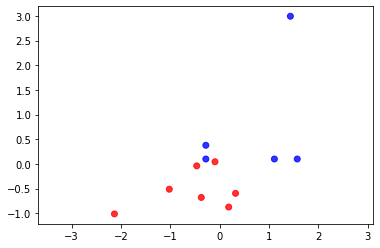

Plot from kmeans:


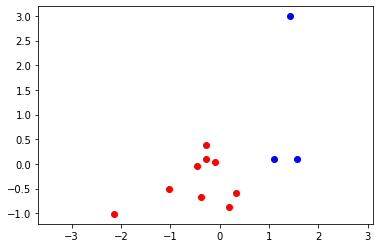

In [3]:
color_map = {'Ice':'Blue', 'Fire':'Red'}
X_kmeans = toy[["Attack", "Defense"]]

scaler = StandardScaler().fit(X_kmeans)
X_scaled = scaler.transform(X_kmeans)

print("Plot with actual labels:")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=toy['Type_1'].map(color_map))
plt.axis('equal');
plt.show()

def compute_kmeans(k, centroids):
    colors = np.array(["red","blue", "green"])
    kmeans = KMeans(n_clusters= k, init=centroids)
    label = kmeans.fit_predict(X_scaled)
    u_labels = np.unique(label)

    for i in u_labels:
        plt.scatter(X_scaled[label == i , 0] , X_scaled[label == i , 1] , label = i, c=colors[i])
    plt.axis('equal')
    #plt.legend()
    plt.show()

print("Plot from kmeans:")
centroids = np.array([(-1, -1), (2,2)])
compute_kmeans(2, centroids)



### Task 1.1.2 (1 point)
Show two examples with two different initial cluster assignments that lead to a different result.

Example 1:


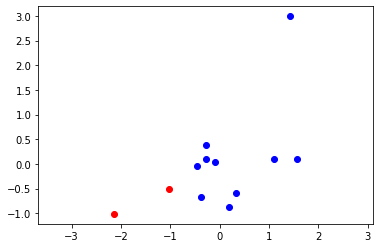

Example 2:


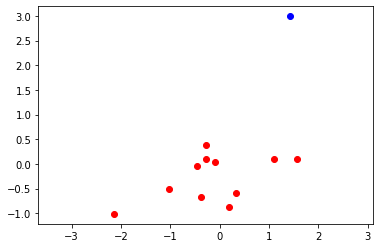

In [4]:
print("Example 1:")
centroids = np.array([(0, -5), (2,2)])
compute_kmeans(2, centroids)

print("Example 2:")
centroids = np.array([(-1, -1), (1,3)])
compute_kmeans(2, centroids)

### Task 1.1.3 (4 points)
Compute the dendrograms using single-link

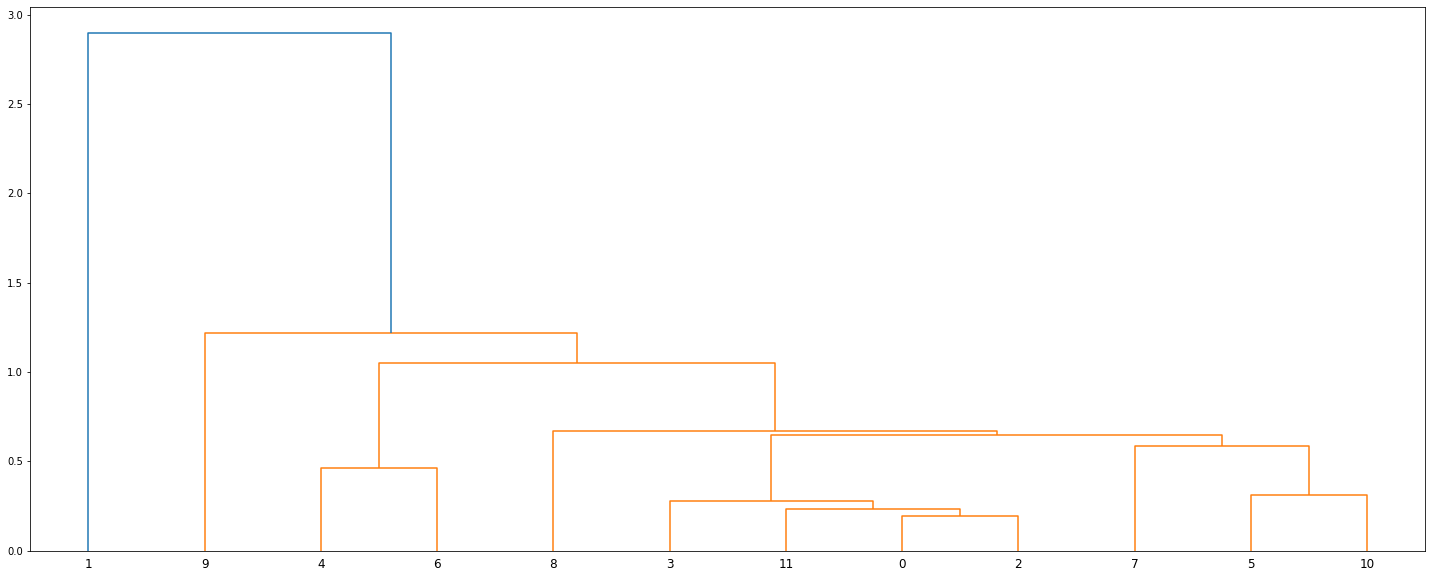

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Task 1.1.4 (2 points)
Run density-based clustering with $\epsilon=1$ and $MinPts=2$. What clusters do you obtain? **For this exercise you can use the DBSCAN from sklearn to check your results** 

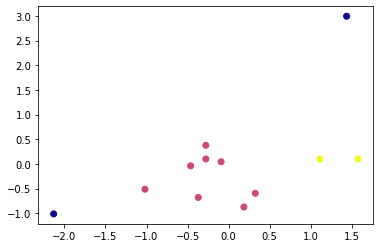

In [6]:
dbscan = DBSCAN(eps = 1, min_samples = 2).fit(X_scaled) # fitting the model
labels = dbscan.labels_

plt.scatter(X_scaled[:, 0], X_scaled[:,1], c = labels, cmap= "plasma")
plt.show()

## Task 1.2 Elliptic data set (4 points)
After looking at the dataset below, you realize that the clusters are elliptic rather than spherical. You want to detect the red outlier point, assuming you know that is an outlier. 

Which approach would be the most obvious to find the red outlier? Please check the box and motivate your answer below:
- [x] Distance based approach
- [ ] Angle based approach
- [ ] Depth based approach

**Your answer**
It is quite far away so it would probably not be categorized as the same.

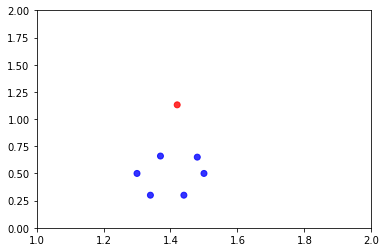

In [7]:
D_new = np.array([[1.42, 1.131], # Red 
                [1.34, 0.3],
                [1.44, 0.30],
                [1.5, 0.5],
                [1.48, 0.65],
                [1.37, 0.66],
                [1.3, 0.50],
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([1, 2, 0,2])
plt.show()

## Task 1.3 Theoretical questions (4 points)
1. You are given a measure $d(x,y) = |x-y|$, show that the measure is a metric 
2. Show that $\hat{\Sigma}=
\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$

**YOUR ANSWER**


# Part 2 Exploratory data analysis
In this section, you will perform preliminary analyses on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms. 

In [8]:
toy = poke[poke['Type_1'].isin(['Fire', 'Ice'])]
data_np = toy.drop(columns = ['#', 'Name', 'Type_1', 'Type_2', 'Generation', 'Legendary']).to_numpy()
headers = ["Name", "Type_1", "Type_2", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]
X = data_np[:,:5]
y = data_np[:,6]
y = y.astype(int) - 1
rows, cols = np.shape(X)
toy.head()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


## Task 2.1 Correlation matrix
### Task 2.1.1 (6 points)
Compute the correlation matrix (not covariance matrix) among all the attributes in the code box below

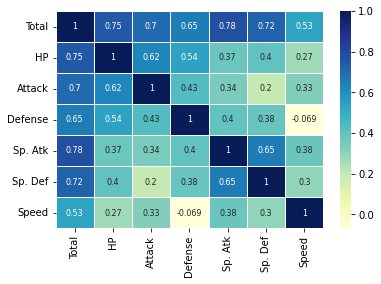

In [9]:
import pandas as pd
X = data_np
y = ["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]

def createDataFrame(X, y):
    data = {}
    for i, l in enumerate(y):
        data[l] = X.transpose()[i]

    return pd.DataFrame(data)

df = createDataFrame(X, y);
corrMatrix = df.corr()
sns.heatmap(corrMatrix,annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8})
plt.show()

### Task 2.1.2 (2 points)
We can also plot the correlation matrix as seen below. What is the relationship between the correlation matrix and the covariance matrix? Please check the correct box below. 

- [ ] The correlation matrix contains the unnormalized covariance values
- [x] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

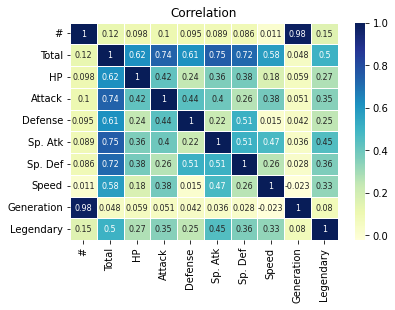

In [10]:
sns.heatmap(poke.corr(),annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Correlation')
plt.show()

### Task 2.1.3 (6 points)
In this task, we reason about the covariance matrices. Normalize the features using standard score normalization and range normalization. Plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

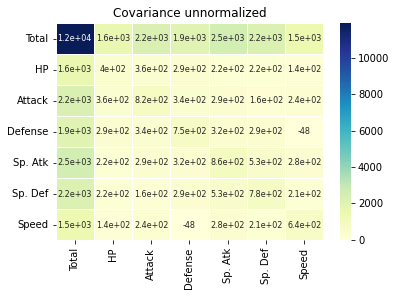

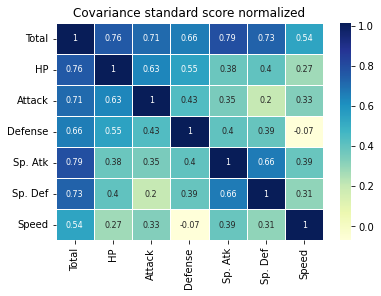

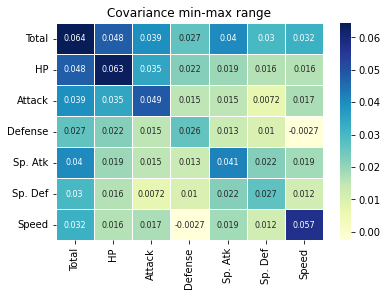

In [11]:
from scipy import stats

X = data_np

# Unnormalized
covMatrixUnnormalized = np.cov(X.transpose())
sns.heatmap(covMatrixUnnormalized, annot=True, xticklabels=y, yticklabels=y, linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8})
plt.title('Covariance unnormalized')
plt.show()

# Standard score normalized
X_ssn = stats.zscore(X)
covMatrixStandardScore = np.cov(X_ssn.transpose())
sns.heatmap(covMatrixStandardScore, annot=True, xticklabels=y, yticklabels=y, linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8})
plt.title('Covariance standard score normalized')
plt.show()

# Range min-max normalized
min_x = X.min(0, keepdims=True)
max_x = X.max(0, keepdims=True)
X_normalize = (X - min_x) / (max_x - min_x)
covMatrixRangeNormalized = np.cov(X_normalize.transpose())
sns.heatmap(covMatrixRangeNormalized, annot=True, xticklabels=y, yticklabels=y, linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8})
plt.title('Covariance min-max range')
plt.show()

### Task 2.1.4 (6 points)
Note how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. Why are these differences appearing?


- [ ] Range normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable.
- [x] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other.
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.


## Task 2.2 Normal distribution

### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution. Implement a method norm_dist that: 
    1) Inputs the number of buckets $b$ and a vector $x$ of values
    2) Outputs the sum of the absolute differences of the buckets between the a histogram with $b$ buckets of a normal variable with $\mu,\sigma$ deviation corresponding sample mean and standard deviation of the input vector and the histogram of the input vectors with $b$ buckets. The sum of the differences is computed as 
    $$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 

Where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

Use the norm function from Scipy to get the normal distribution to subtract from.

In [12]:
from scipy.stats import norm

## Our data comes from the variable X
## print(X)
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (1 point)
Is the method in Task 2.2.1 a good method? Is it robust to outliers? Run your code on each columns of the dataset.
What is the column with the largest distance? Compare the norm_dist of each attribute feature in the dataset.

In [13]:
# Our data is still from X

print("YOUR CODE HERE")

YOUR CODE HERE


### Task 2.2.3 (2 points)
Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

Discuss why this method is more robust than the one we proposed in Task 2.2.1.

**YOUR ANSWER HERE**

<Figure size 432x288 with 0 Axes>

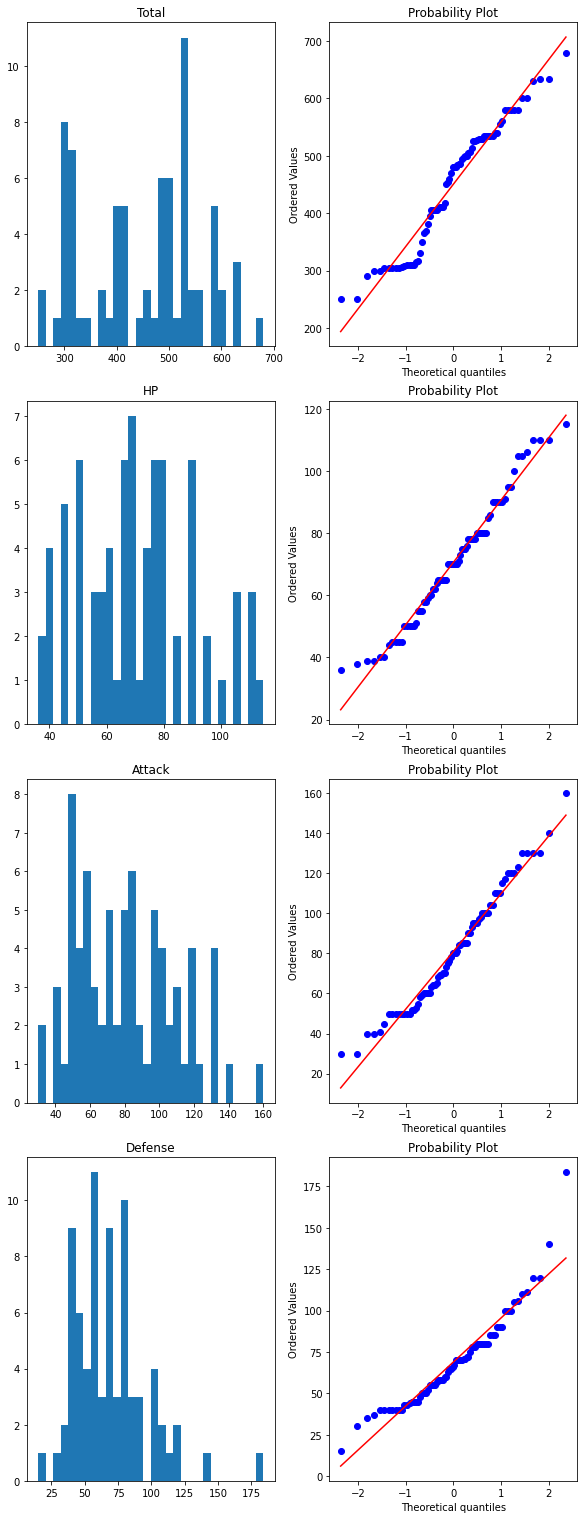

In [14]:
from scipy import stats
from matplotlib import gridspec

data = toy.drop(columns = ['#', 'Name', 'Type_1', 'Type_2', 'Generation', 'Legendary'])

plt.tight_layout()
_, n = data.shape

fig = plt.figure(constrained_layout=True, figsize=(8, 30))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(3,n): 
    x = data[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset above and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
Implement and use the elbow method detect the number of clusters . For plotting you can use the **silhouette coefficient.**

Use the "Total" and "Stp. Atk" features of the data set.

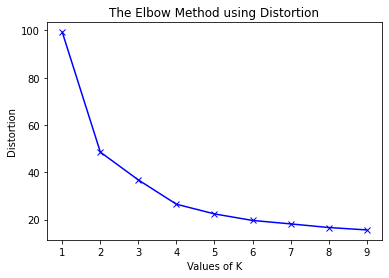

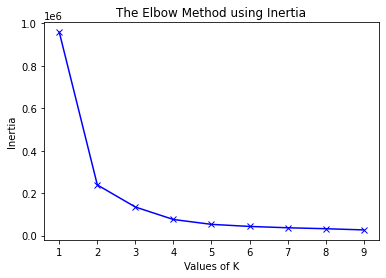

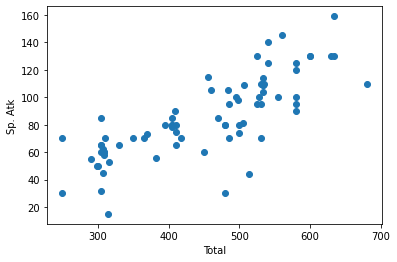

In [15]:
from scipy.spatial.distance import cdist

X = toy[["Total", "Sp. Atk"]].to_numpy()

def elbow_method(X, k=10):
    distortions = []
    inertias = []

    K = range(1, k)
    
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
    
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)

    return K, distortions, inertias


K, distortions, inertias = elbow_method(X)


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

plt.xlabel('Total')
plt.ylabel('Sp. Atk')
plt.scatter(X.transpose()[0], X.transpose()[1])
plt.show()

It would seem there is two clusters

### Task 3.1.2 (2 points)
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

**Note**: you can use the KMeans implementation from scikit-learn

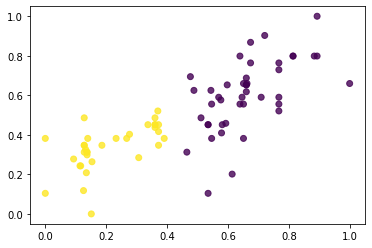

In [16]:
### YOUR CODE HERE
X = toy[["Total", "Sp. Atk"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

#clusters = []

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters = kmeans.predict(X)

plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (4 points)
Implement Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$

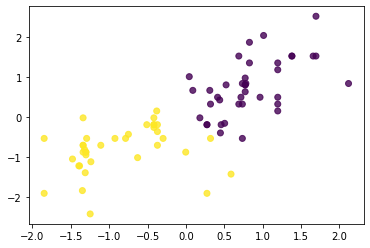

In [17]:
### YOUR CODE HERE
X = toy[["Total", "Sp. Atk"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.8): 
    return math.exp(abs(x - y)**2/2*sigma**2)


def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=.01): 
    ### YOUR CODE HERE
    #X_kernel = [gaussian_kernel(x, y) for [x, y] in X]
    kmeans = KMeans(n_clusters=n_clusters, max_iter=iters)
    
    kmeans.fit(X)
    clusters = kmeans.predict(X)

    ### YOUR CODE HERE
    return clusters


# clusters = kernel_kmeans(X_norm, NUMBER_OF_CLUSTERS)
clusters = kernel_kmeans(X_norm, 2)

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
# clusters = kernel_kmeans(X_scaled, SOME_AMOUNT_OF_CLUSTERS)
clusters = kernel_kmeans(X_scaled, 2)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)

## Task 3.2 Clustering quality

### Task 3.2.1 (4 points)
Now we will implement, *mutual information* and a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

Mutual information for two clusterings $U$ and $V$ is defined as $\text{MI}(U,V) = \sum\limits^{|U|}_{i=1} \sum\limits^{|V|}_{j=1} \frac{|U_i \cap V_j|}{N} \log  N \frac{|U_i \cap V_j|}{|U_i||V_j|}$.
We first need to implement entropy and then we will define mutual information.

In [18]:
from math import log2

def entropy(C):
    # Let C be a list of clusters
    N = len(C)
    n_clusters = np.max(C)
    return -sum([(C.count(i)/N) * log2(C.count(i)/N) for i in range(0, n_clusters)])


def MI(C1, C2):
    mi = 0
    ### YOUR CODE HERE
    N = len(C1)
    n_clusters = np.max(np.append(C1, C2))

    for i in range(0, n_clusters):
        for j in range(0, n_clusters):
            intersection = sum([1 if C1[c] == i and C2[c] == j else 0 for c in range(0, N)])
            mi += (intersection/N) * log2(N * (intersection/(C1.count(i)*C2.count(j))))
        
    ### YOUR CODE HERE
    return mi

def NMI(C1, C2):
    mi = MI(C1, C2)
    h_c1 = entropy(C1)
    h_c2 = entropy(C2)
    return mi/(np.sqrt(h_c1 * h_c2))
    

X = toy[["Total", "Sp. Atk"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

### Task 3.2.2 (4 points)
Plot the NMI (Use the provided NMI function from the previous task) among the class labels $y$ and the clusters you found with k-means in Task 3.1. Make sure that the number of clusters and the number of class labels is the same (2).
- Reason about the measure, is the measure influenced by the size of the clusters?  
- What does the measure capture? 

In [19]:
###YOUR CODE HERE
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(X_norm)
clusters = kmeans.predict(X_norm)

class_labels = np.array(toy["Type_1"])
class_labels = [1 if x == "Fire" else 0 for x in class_labels]

print(class_labels)
print(clusters.tolist())

print(NMI(class_labels, class_labels))
print(NMI(clusters.tolist(), clusters.tolist()))

nmi = NMI(clusters.tolist(), class_labels)

print(nmi)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
0.9999999999999998
1.0
-0.023095844591504714


I would not say that the size influence the measure.

It tells you something about how much information they have in common.

### Task 3.2.3 (4 points)
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth clusters obtained from the labels $y$.

In [20]:
### YOUR CODE HERE
T = class_labels # Ground-truth clusters
C = clusters.tolist() # Clusters obtained by k-means
### YOUR CODE HERE

## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = 0
    ### YOUR CODE HERE
    N = len(C)
    n_clusters = np.max(np.append(C, T))

    for i in range(0, n_clusters):
        intersection_max = 0
        for j in range(0, n_clusters):
            intersection = sum([1 if C[c] == i and T[c] == j else 0 for c in range(0, N)])
            if intersection > intersection_max:
                intersection_max = intersection

        purity += intersection_max/C.count(i)
        
    ### YOUR CODE HERE
    return purity

print(purity(C, C))
print(purity(T, T))

print('Purity: {}, NMI: {}'.format(purity(C,T), NMI(C,T)))

1.0
1.0
Purity: 0.3, NMI: -0.023095844591504714


### Task 3.2.4 (2 points)

Plot purity and compare purity with NMI. Which measure is preferable?

- [ ] NMI is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [x] NMI is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.


### Task 3.3 DBScan


### Task 3.3.1 (1 point)

Run DB-Scan with parameters $\varepsilon=0.1, minPts=2$ from sklearn and compare the results with k-means. Which of the two achieve a better NMI? 


In [21]:
### YOUR ANSWER

dbscan = DBSCAN(eps=0.1, min_samples=2).fit(X_norm)
clusters_dbs = dbscan.labels_
print(clusters_dbs)
print("DBSCAN: {}".format(NMI(clusters_dbs.tolist(), class_labels)))
print("K-means: {}".format(NMI(clusters.tolist(), class_labels)))


[ 0  0  1  1 -1  0  1  0  1  0  1  1  1  1  1  1  0  0  1 -1  0 -1  0  0
 -1  0  1 -1  0  0  1  1  0  1  1  1  0  1  1  0  0  1  1  0  0  1  1  1
  1  1  1  0  0  1  0  1 -1 -1  1  0  0  1  0  1  1  1  0  0  1  0  1  0
  1  0 -1  1]
DBSCAN: -0.016620706111662047
K-means: -0.023095844591504714


### Task 3.3.2 (4 points)
DBScan requires tuning of parameters $\varepsilon, MinPts$. Implement the heuristic strategy in the slides to find the best parameters. Run the code and see whether the results with DBScan improve.

In [22]:
def tune_dbscan(X): 
    eps = 0
    min_pts = (X.shape[1] *2)-1
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return eps

### Task 3.3.3 (6 points)
Implement a simple subspace clustering algorithm.
1. Take all subsets of 2,3 attributes. Beware that you should only use the numerical attributes.
2. Run dbscan on each subset. 
3. Compute NMI for each subset. 
4. Keep the k subsets with the largest NMI. 
    
**Note**: You may have to experiment a lot with eps and MinPts to get reasonable clusterings


In [23]:
# Necessary Data normalization!
X_pt = toy[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]].to_numpy()
X_norm_pt = (X_pt - X_pt.min(0)) / X_pt.ptp(0)
print("YOUR CODE HERE!")

YOUR CODE HERE!


### Task 3.3.4 (4 points)
Analyze the following from Task 3.3.3
1. Advantages and disadvantages of the proposed algorithm
2. Which subsets of attributes give the best results? Can you explain why?

**YOUR ANSWER HERE**

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset.

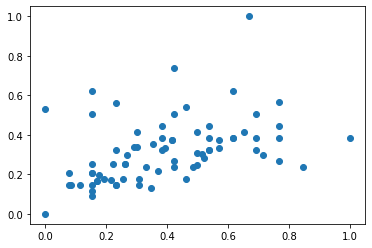

In [24]:
X_small = toy[["Attack", "Defense"]].to_numpy()

X_norm = (X_small - X_small.min(0)) / X_small.ptp(0)

plt.scatter(X_norm[:, 0] , X_norm[:, 1])
plt.show()

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
We will first implement a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction pi of the other points have a distance less of than eps to it.

In [25]:
import math

def DBOutliers(X, eps, pi): 
    outliers = np.empty((0, 2))
    for p in X:
        count = 0
        for x in X:
            dist = math.hypot(p[0] - x[0], p[1] - x[1])
            if dist < eps:
                count += 1
        count_pct = count/len(X)
        
        if count_pct <= pi:
            outliers = np.append(outliers, np.array([p]), axis=0)
    
    return outliers

## Task 4.1.2 (2 points)
DBOutliers requires tuning the parameters eps, pi. Discuss how the results vary with those parameters. 

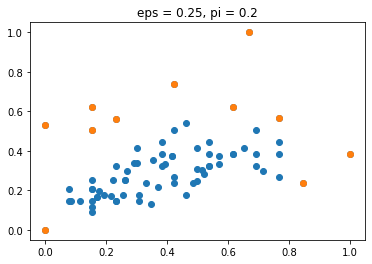

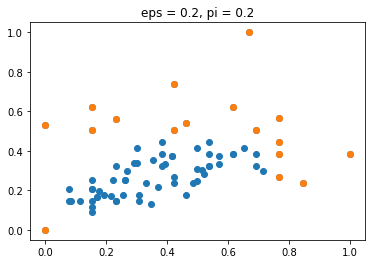

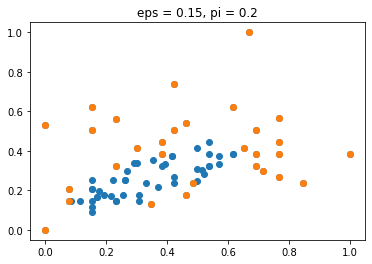

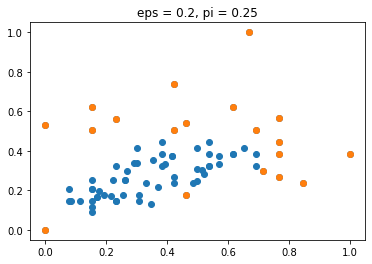

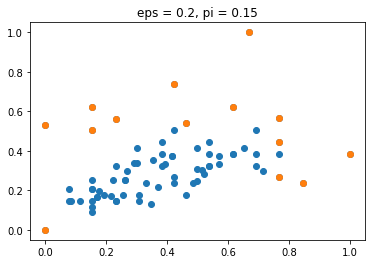

In [26]:
### YOUR CODE
def plot_outliers(eps, pi):
    outliers = DBOutliers(X_norm, eps, pi)
    plt.scatter(X_norm.transpose()[0], X_norm.transpose()[1])
    plt.scatter(outliers.transpose()[0], outliers.transpose()[1])
    plt.title("eps = {}, pi = {}".format(eps, pi))
    plt.show()

plot_outliers(0.25, 0.2)
plot_outliers(0.2, 0.2)
plot_outliers(0.15, 0.2)

plot_outliers(0.2, 0.25)
plot_outliers(0.2, 0.15)

As we can see by changing the values we get a bit of a different effect depending on what we change. Lowering eps increase the amount of outliers we get and increasing pi also increases the amount of outliers. 

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

Propose a heuristic method to tune parameters eps, pi. 

In [27]:
def tune_dboutliers(X): 
    eps = 0
    pi = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return eps, pi

## Task 4.2 LOF (2 points)
Using the parameters eps=0.2, pi=0.2 compare the results of DBOutliers with those of LOF implemented in Week 9. What outliers do you find?

In [28]:
print("Your code here!")

Your code here!


**YOUR ANSWER**



